<a href="https://colab.research.google.com/github/guilhermelaviola/IntegratingPracticeInDataScienceForBusiness/blob/main/TimeSeriesSalesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Sales Forecasting**

Imagine that you have been assigned to help a fictitious company forecast its future sales using historical monthly sales data. To do this, you must:
- Load and Visualize Data: use fictitious sales data to create a time series and plot an initial graph.
- Apply Smoothing Techniques: implement a smoothing technique to reduce the impact of seasonal fluctuations and outliers in the data.
- Decompose the Time Series: decompose the time series into its main components (trend, seasonality, and residuals) and visualize each of them.
- Interpret Results and Make Recommendations: analyze the components of the time series to provide recommendations on sales planning and inventory management.

## **Step 1: Loading and Visualizing the Data**

<ipython-input-5-0c885c9ad715>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2023-01-01', periods=24, freq='M')


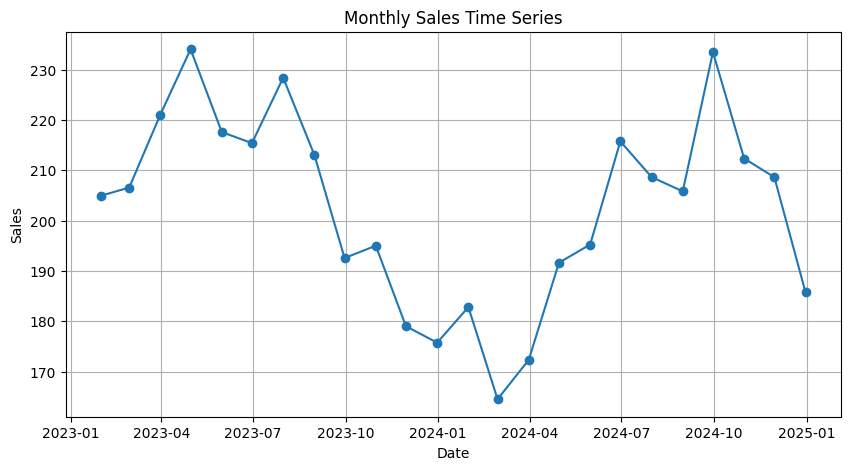

In [5]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting seed for reproducibility
np.random.seed(42)

# Generate fictitious monthly sales data for 24 months
months = pd.date_range(start='2023-01-01', periods=24, freq='M')
sales = 200 + np.sin(np.linspace(0, 3 * np.pi, 24)) * 20 + np.random.normal(0, 10, 24)

# Create a DataFrame
df = pd.DataFrame({'Date': months, 'Sales': sales})
df.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], marker='o')
plt.title('Monthly Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


## **Step 2: Applying Smoothing Techniques (Moving Average)**

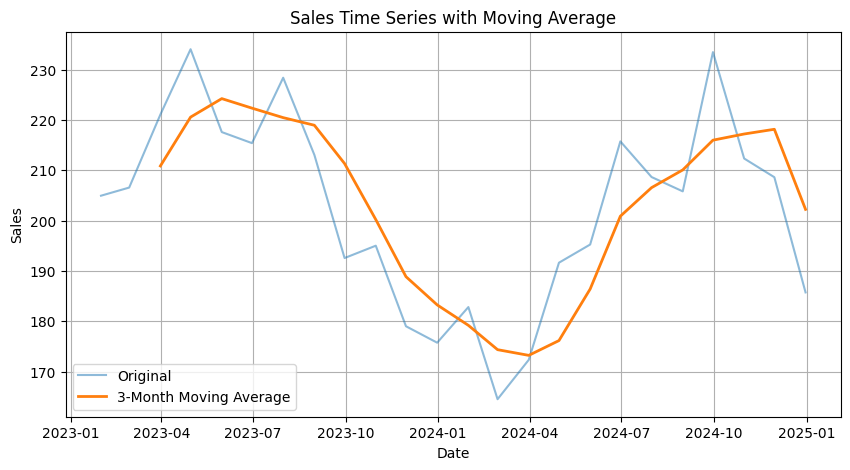

In [6]:
# Calculate the 3-month moving average
df['Smoothed'] = df['Sales'].rolling(window=3).mean()

# Plot original and smoothed time series
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], label='Original', alpha=0.5)
plt.plot(df.index, df['Smoothed'], label='3-Month Moving Average', linewidth=2)
plt.title('Sales Time Series with Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

## **Step 3: Decomposing the Time Series**

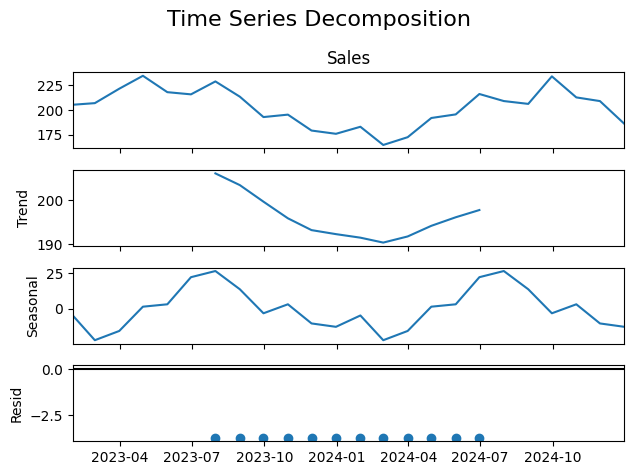

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series using additive model
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)

# Plot the decomposition components
decomposition.plot()
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()